<a href="https://colab.research.google.com/github/ignornce/Interpretibality-Of-DL/blob/main/Resources/Copy_of_Fine_tuned_Model_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-tuned PaliGemma Inference

In this notebook we will see how to infer a PaliGemma fine-tuned model (using 🤗 transformers).

We need the latest version of transformers library.

In [ ]:
!pip install -q -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 65.9 MB/s eta 0:00:00


Let's login to Hugging Face.

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Let's load the model.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gobert_1.png to Gobert_1.png


In [ ]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

model_id = "merve/paligemma_vqav2"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)
processor = AutoProcessor.from_pretrained("google/paligemma-3b-pt-224")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

We have fine-tuned the model on visual question answering (VQAv2). Hence, we will pass an image to the model and ask a question about it. Below is a rather challenging image for vision language models. Pretrained PaliGemma responds below image and question with "antique".

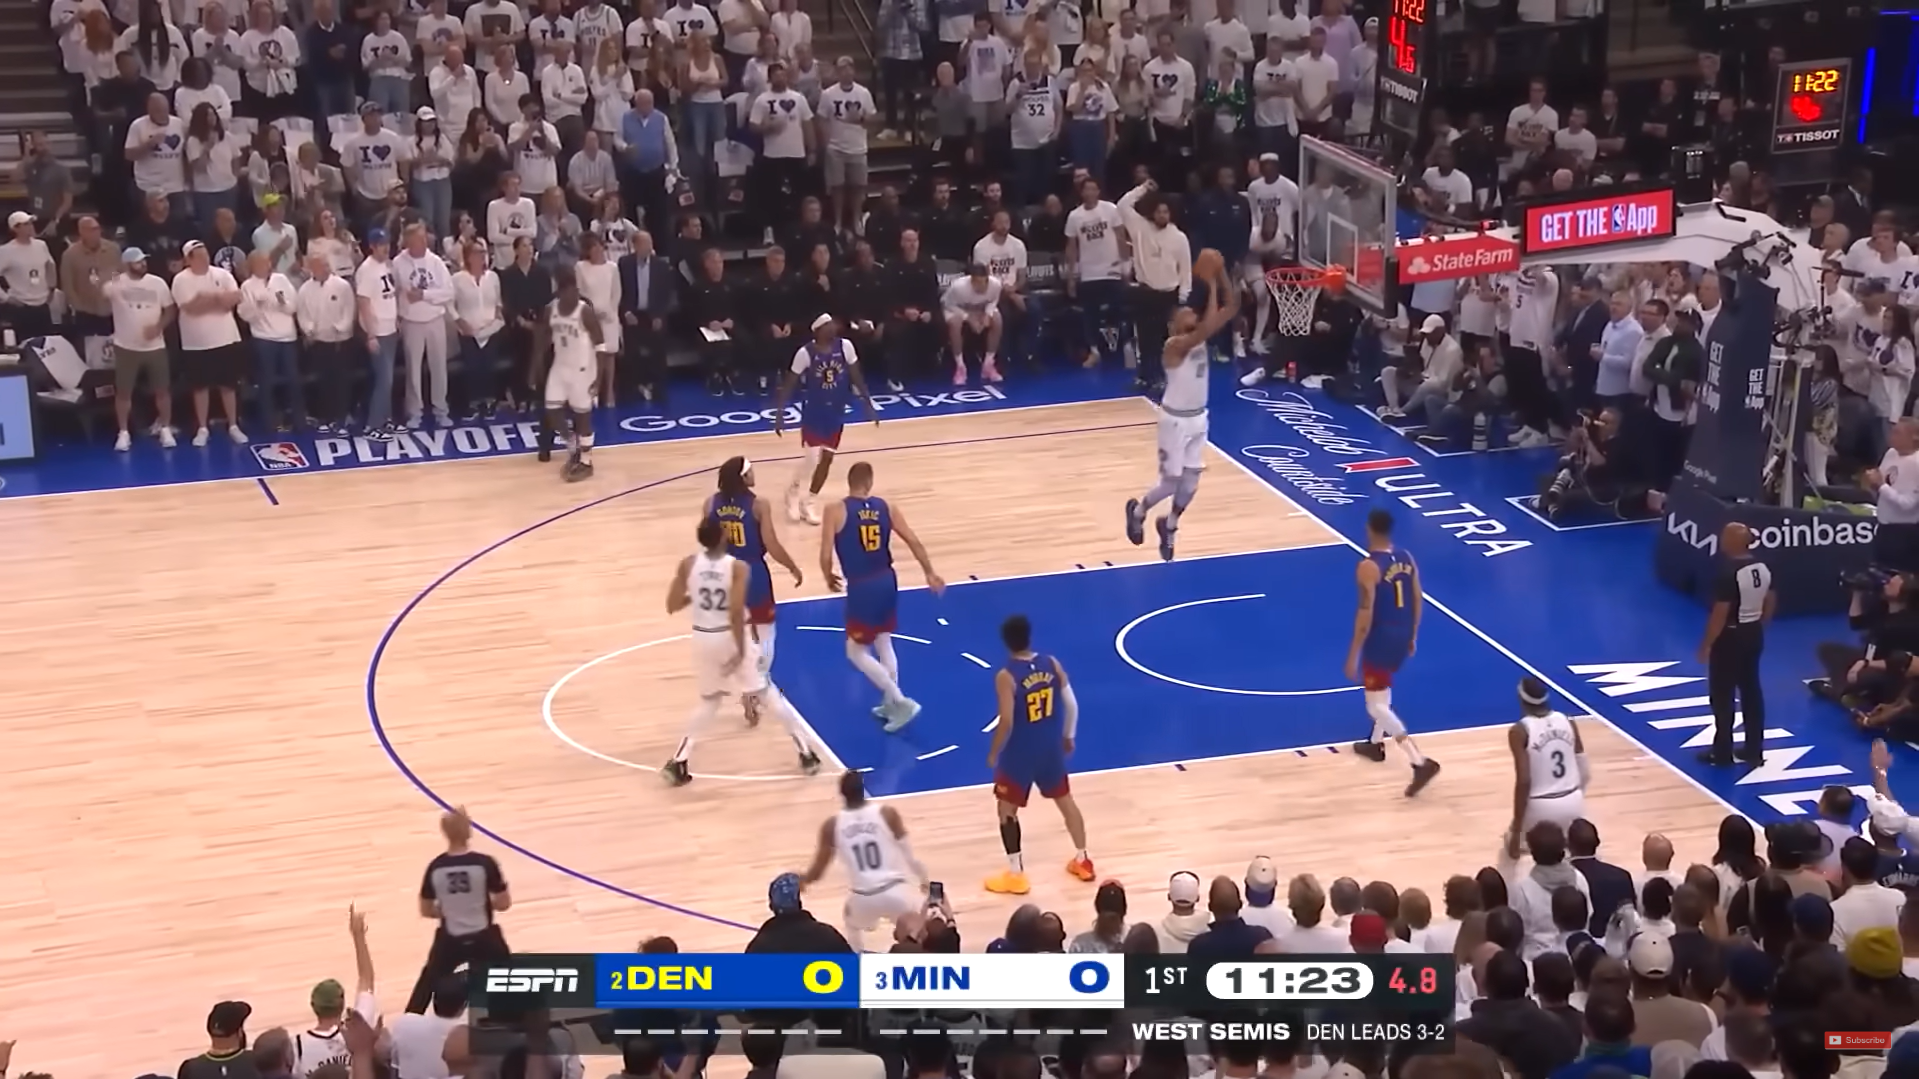

In [ ]:
from PIL import Image
import requests
import IPython.display as display


image_file = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png?download=true"
raw_image = Image.open("Gobert_1.png")
display.display(raw_image)

In [ ]:
prompt = "Describe in details, what happens in the image."
inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)

print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])



basketball


In [ ]:
!ls


9f4f8-15788655545325-500.jpg  img.jpg  sample_data
